In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris = iris[iris.species != 'virginica']

In [4]:
iris.species.unique()

array(['setosa', 'versicolor'], dtype=object)

In [5]:
iris['species'] = iris.species.map({'setosa': 0 , 'versicolor': 1})

In [6]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


<Axes: >

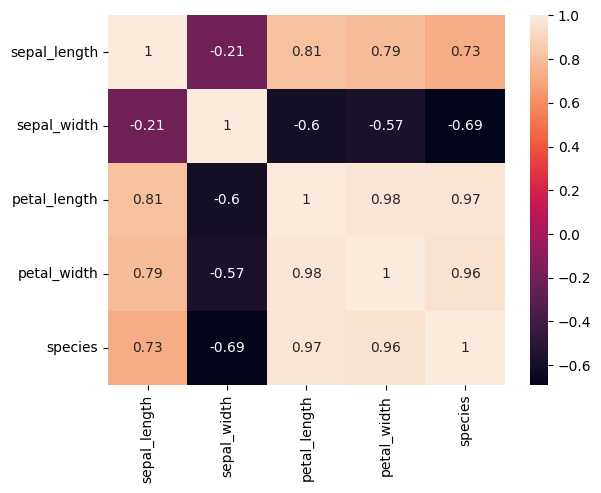

In [7]:
sns.heatmap(iris.corr(), annot = True)

In [8]:
iris.drop('sepal_width', axis= 1, inplace=True)

In [9]:
x = iris.iloc[:,:-1]
y = iris.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [12]:
LR_Classifier = LogisticRegression()

In [13]:
LR_Classifier.fit(x_train,y_train)

LogisticRegression()

In [14]:
y_test_pred = LR_Classifier.predict(x_test)

In [15]:
y_test_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [16]:
y_test

83    1
53    1
70    1
45    0
44    0
39    0
22    0
80    1
10    0
0     0
18    0
30    0
73    1
33    0
90    1
4     0
76    1
77    1
12    0
31    0
Name: species, dtype: int64

In [17]:
from sklearn.metrics import confusion_matrix

<Axes: >

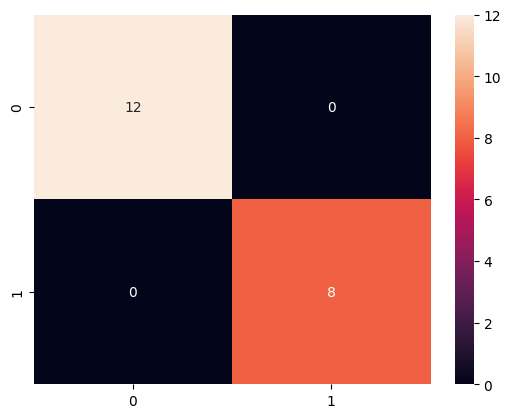

In [18]:
sns.heatmap(confusion_matrix(y_test,y_test_pred), annot= True)

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [20]:
print("testing accuracy: ",accuracy_score(y_test,y_test_pred))

testing accuracy:  1.0


In [21]:
print("recall: ",recall_score(y_test,y_test_pred))

recall:  1.0


In [22]:
print("Preciesion: ",precision_score(y_test,y_test_pred))

Preciesion:  1.0


In [23]:
print("F1:",f1_score(y_test,y_test_pred))

F1: 1.0


In [24]:
print(confusion_matrix(y_test,y_test_pred))

[[12  0]
 [ 0  8]]


In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [27]:
from sklearn.metrics import mean_absolute_error, r2_score

In [28]:
print(mean_absolute_error(y_test,y_test_pred))

0.0


In [29]:
print(r2_score(y_test,y_test_pred))

1.0


In [32]:
lung_cancer = pd.read_csv('Datasets/survey_lung_cancer.csv')

In [33]:
lung_cancer

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [34]:
lung_cancer['GENDER'] = lung_cancer.GENDER.map({'M':0,'F':1})
lung_cancer['LUNG_CANCER'] = lung_cancer.LUNG_CANCER.map({'YES':1,'NO':0})

In [35]:
lung_cancer

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,0,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,0,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,0,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


<Axes: >

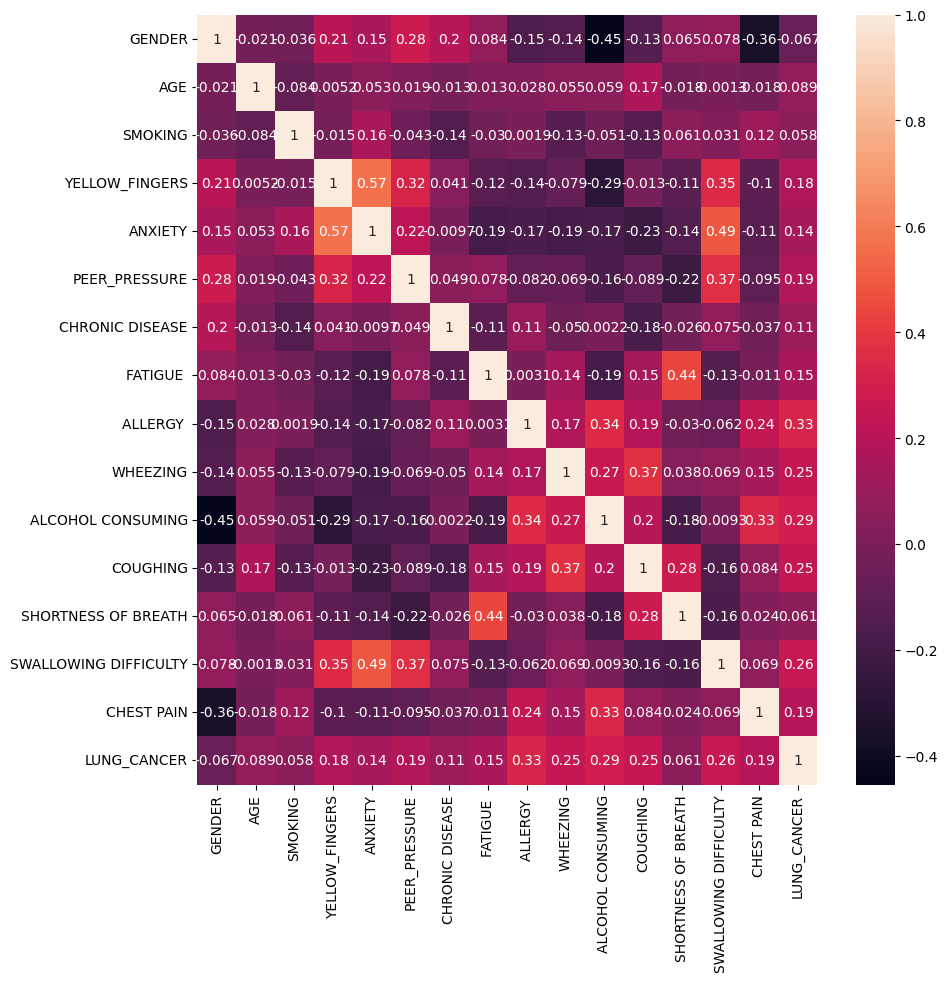

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(lung_cancer.corr(),annot=True)

In [38]:
x_can_train, x_can_test, y_can_train, y_can_test = train_test_split(lung_cancer.iloc[:,1:-1],lung_cancer.iloc[:,-1], test_size=0.25, random_state=42)

In [69]:
cancer_classifier = LogisticRegression(tol=0.001,C=9)

In [70]:
cancer_classifier.fit(x_can_train,y_can_train)

C:\Users\memon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=9, tol=0.001)

In [71]:
x_can_pred = cancer_classifier.predict(x_can_test)

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, r2_score, mean_squared_error

In [72]:
print("accuracy: ",accuracy_score(y_can_test,x_can_pred))

accuracy:  0.9743589743589743


In [73]:
print("precision:",precision_score(y_can_test,x_can_pred))

precision: 0.9733333333333334


In [74]:
print("recall:",recall_score(y_can_test,x_can_pred))

recall: 1.0


In [75]:
print(classification_report(y_can_test,x_can_pred))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.97      1.00      0.99        73

    accuracy                           0.97        78
   macro avg       0.99      0.80      0.87        78
weighted avg       0.98      0.97      0.97        78



In [48]:
print("MSE: ",mean_squared_error(y_can_test,x_can_pred))

MSE:  0.038461538461538464


In [49]:
print('R2: ',r2_score(y_can_test,x_can_pred))

R2:  0.3589041095890412


In [50]:
from sklearn.model_selection import GridSearchCV

In [59]:
cancer_classifier = LogisticRegression()

In [60]:
parm_grid = {"C": [1,2,4,5,6,9,10],'tol':[0.001,0.0001,0.01]}

In [61]:
cancer_grid = GridSearchCV(estimator=cancer_classifier, param_grid=parm_grid, cv=5, scoring='accuracy')

In [62]:
cancer_grid.fit(x_can_train,y_can_train)

C:\Users\memon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\memon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 4, 5, 6, 9, 10],
                         'tol': [0.001, 0.0001, 0.01]},
             scoring='accuracy')

In [66]:
y_test_pred = cancer_grid.predict(x_can_test)

In [65]:
cancer_grid.best_params_
cancer_grid.best_score_

np.float64(0.904995374653099)

In [58]:
cancer_grid.best_score_

np.float64(0.904995374653099)

In [67]:
print("testing accuracy: ",accuracy_score(y_can_test,y_test_pred))

testing accuracy:  0.9615384615384616


In [68]:
print(classification_report(y_can_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.97      0.99      0.98        73

    accuracy                           0.96        78
   macro avg       0.86      0.79      0.82        78
weighted avg       0.96      0.96      0.96        78



In [79]:
lung_cancer.LUNG_CANCER.value_counts()

LUNG_CANCER
1    270
0     39
Name: count, dtype: int64